# Exercise 04
**_Andres Mauricio Obando Acevedo_**

# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

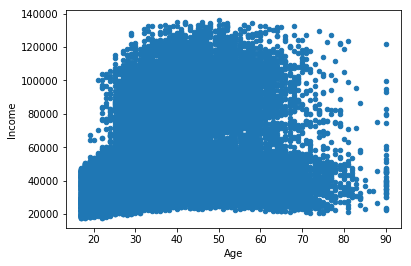

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

For answer to first question, let's see first the correlation:

In [4]:
Correlation = income['Age'].corr(income['Income'])
Correlation

0.2904082980024352

We can see that the correlation between age and income is positive, so we can say that for an increase in the age, is expected an increase on the income.

But, for a one percent of increase in the age, we cann't know what is the exactly increase on the income, jus knowing the plot and the correlation index. So, we need something else, for example, a linear regression.

**Now, we estimate a linear regression using sklearn:**

In [5]:
# Creating the x and y:
X = income[['Age']]
y = income['Income']

In [6]:
#Importing libraries:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [7]:
# Initialize
linreg0 = SGDRegressor(fit_intercept=False, max_iter=500,tol = 0.0000001)
# Fit
linreg0.fit(X, y)

#Coeficients: beta
print('Coeficients with SGD: ',linreg0.coef_[0])

Coeficients with SGD:  1303.181455243116


The $\beta$ can be interpreted as this: for each unit of increase of Age, the incoming increases $\beta$ USD

In [8]:
#Predict: When the ages is 30, and when the age is 40, How much is the income?
x = np.array([30., 40.])

In [9]:
#Without Normalize:
linreg0.predict(x.reshape(-1,1))

array([39095.44365729, 52127.25820972])

# Exercise 4.2
Evaluate the model using the MSE

In [11]:
#Predict all data:
y_pred = linreg0.predict(income[['Age']])

In [12]:
from sklearn import metrics
MSE_mod1 = metrics.mean_squared_error(income['Income'], y_pred)
print('MSE:', MSE_mod1)

MSE: 711628543.3011564



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [13]:
#Creating new feature:
income['Age2'] = income['Age'] ** 2

In [14]:
#Redefining X:
X = income[['Age', 'Age2']]

In [15]:
#Importing libraries:
from sklearn.linear_model import LinearRegression

In [16]:
#Preprocessing: Normalizing
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([  38.58164676, 1674.59915236]), array([  13.64022309, 1179.02941609]))

In [17]:
# Using Sklearn, with OLS:

# Initialize
linreg2 = LinearRegression(fit_intercept=False)
# Fit
linreg2.fit(X, y)

#Coeficients
print('Coeficients with OLS: ',linreg2.coef_)

Coeficients with OLS:  [ 42718.04340395 -36011.57934338]


# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [18]:
income.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income',
       'Age2'],
      dtype='object')

In [19]:
#Including new feature:
X4 = income[['Age', 'Capital Gain', 'Capital Loss', 'Hours per week']]

In [20]:
#Preprocessing: Normalizing
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X4.astype(np.float))
X4 = ss.transform(X4.astype(np.float))
ss.mean_, ss.scale_

(array([  38.58164676, 1077.64884371,   87.30382973,   40.43745585]),
 array([  13.64022309, 7385.17867695,  402.95403083,   12.34723908]))

In [21]:
# Using Sklearn, with SGD:

# Initialize
linreg2 = SGDRegressor(fit_intercept=False, max_iter=500,tol = 0.0000001)
# Fit
linreg2.fit(X4, y)

#Coeficients: beta
print('Coeficients with SGD for full model: ',linreg2.coef_)

Coeficients with SGD for full model:  [8199.38703149 4597.84413091 3297.1835468  5414.47658637]


**To see the performance of both models, with all features and only the age:**

The MSE of model with only the Age:

In [22]:
MSE_mod1

711628543.3011564

The MSE of model with all features:

In [23]:
#Predict all data:
y_pred2 = linreg2.predict(X4)

In [24]:
from sklearn import metrics
MSE_mod2 = metrics.mean_squared_error(income['Income'], y_pred2)
print('MSE:',MSE_mod2 )

MSE: 3379900972.2849684


In [25]:
MSE_mod2 > MSE_mod1

True

As the MSE of the model with all features is less than MSE of the model with one feature (Age), we can say that the model with all features is better model than model with only age as feature.

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [26]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [27]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [29]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [30]:
data['Churn_True'] = data['Churn?'].map({'False.':0, 'True.':1})
Y = ['Churn_True']
feature_cols = ['Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls']
# defining X and y:
X = data[feature_cols]
y = data[Y]

**Distribution of the churners**

In [31]:
# % de Churn:
ChurnTrue = np.sum(data['Churn_True'])
ChurnTot = data.shape[0]
ChurnPerc = 100*ChurnTrue / ChurnTot
ChurnPerc

14.491449144914492

Trying to see the form of distribution of data:

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


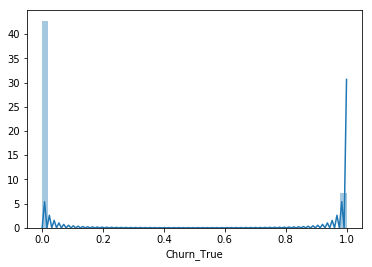

In [32]:
import seaborn as sb
sb.distplot(data['Churn_True'])
plt.show()

**Split data in training and test**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30)

In [34]:
data_training = pd.DataFrame(data=X_train)
data_training['Churn_True'] = pd.DataFrame(data=y_train)

data_test = pd.DataFrame(data=X_test)
data_test['Churn_True'] = pd.DataFrame(data=y_test)

print('Training: ',data_training.shape, '\nTest: ',data_test.shape)

Training:  (2333, 14) 
Test:  (1000, 14)


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [35]:
# Using training data:

X_tr = data_training[feature_cols]
y_tr = data_training['Churn_True']

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)

logreg.fit(X_tr, y_tr)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [36]:
#Validate on test data:
X_ts = data_test[feature_cols]
y_ts = data_test['Churn_True']
data_test['churn_pred_class'] = logreg.predict(X_ts)

In [37]:
data_test.head()

,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn_True,churn_pred_class
2762,51.5,90,8.76,164.0,98,13.94,169.4,80,7.62,9.5,4,2.57,3,0,0
892,166.9,85,28.37,221.2,92,18.80,197.3,97,8.88,12.3,4,3.32,1,1,0
544,103.1,90,17.53,243.0,135,20.66,76.4,92,3.44,12.2,8,3.29,3,0,0
3177,153.9,102,26.16,140.7,117,11.96,217.7,101,9.80,12.8,5,3.46,1,0,0
1754,190.5,108,32.39,259.7,108,22.07,141.5,111,6.37,9.7,2,2.62,2,1,0


# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


**Confusion Matrix**

In [38]:
from sklearn.metrics import confusion_matrix
y_pred = data_test['churn_pred_class']

cnf_matrix = confusion_matrix(y_ts, y_pred)
cnf_matrix

array([[846,  20],
       [122,  12]], dtype=int64)

In [39]:
#In Other way:
tn, fp, fn, tp = cnf_matrix.ravel()
neg=tn+fn
pos=tp+fp
tru=tn+tp
fal=fn+fp
print('      True\tFalse\tTotal','\nNeg   ',tn,'\t',fn,'\t ',neg,'\nPos    ',tp, '\t ',fp,'\t  ',pos,'\nTotal ',tru,'\t',fal,'\t',neg+pos)

      True	False	Total 
Neg    846 	 122 	  968 
Pos     12 	  20 	   32 
Total  858 	 142 	 1000


**Accuracy of the model over the test data**

In [40]:
# Good estimation: True Pos + False Neg
# Bad estimation: True Neg + False Pos
# % of good estimation:
print("The percent of good estimated is: ", 100*(tp+fn)/y_pred.shape[0],'%')



The percent of good estimated is:  13.4 %


We can see that the model cann't predict very well on data test